In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from lineare_regression import linear_hypothesis, cost_function, compute_new_theta, train_univariate_linear_regression


# 1. Generierung von Zufallsdaten

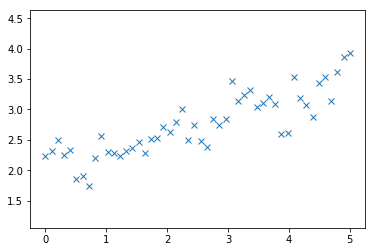

In [12]:
def multivariate_normal_random_data():
    mean = [0, 0]
    cov = [[1, 1], [1, 1.2]]
    #cov = [[1, 1], [1, 2]]
    random_data = np.random.multivariate_normal(mean, cov, 50)
    return random_data.T

def normal_random_data(m, b, x_min, x_max, sample_size, mean, std):
    linear_func = lambda x: m * x + b
    random_data = np.zeros((sample_size, 2))
    normal_random_data = np.random.normal(loc=mean, scale=std, size=sample_size)
    for i, x in np.ndenumerate(np.linspace(x_min, x_max, sample_size)):
        random_data[i][0] = x
        random_data[i][1] = linear_func(x) + normal_random_data[i]
        
    return random_data.T
        
#x, y = multivariate_normal_random_data()
x, y = normal_random_data(m=0.3, b=2, x_min=0, x_max=5, sample_size=50, mean=0, std=0.3)

plt.plot(x, y, "x")
plt.axis("equal")
plt.show()


# 2. Implementierung der Hypothese

Erstellung einer linearen Hypothese mit $\theta_0$ und $\theta_1$. Ausgabe des Ergebnisses dieser für die $x$-Werte 1 und 2.

$h_\theta(x)=\theta_0+\theta_1x$

In [13]:
theta_0 = 2.
theta_1 = 3.

h = linear_hypothesis(theta_0, theta_1)

test_x_values = [1., 2.]
print(h(np.array(test_x_values)))

[5. 8.]


# 3. Implementierung der Kostenfunktion
$J_D(\theta)=\frac{1}{2m}\sum^{m}_{i=1}{(h_\theta(x_i)-y_i)^2}$

In [14]:
j = cost_function(linear_hypothesis, x, y)

print(j(2.1, 2.9))

29.1048069254565


# 4. Contourplot der Kostenfunktion in der Umgebung des Minimums

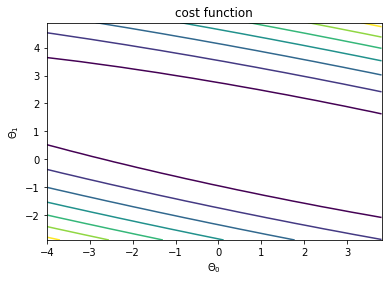

In [17]:
theta_0_min = 0
theta_1_min = 1.1
step = 0.05
range_offset = 4

possible_theta_0 = np.arange(theta_0_min - range_offset, theta_0_min + range_offset, range_offset * step)
possible_theta_1 = np.arange(theta_1_min - range_offset, theta_1_min + range_offset, range_offset * step)

costs = np.zeros([len(possible_theta_0), len(possible_theta_1)])
cost_func = cost_function(linear_hypothesis, x, y)

for i, current_theta_0 in enumerate(possible_theta_0):
    for j, current_theta_1 in enumerate(possible_theta_1):
        costs[j][i] = cost_func(current_theta_0, current_theta_1)

theta_0_mat, theta_1_mat = np.meshgrid(possible_theta_0, possible_theta_1)

#plt.subplot(121)
plt.contour(theta_0_mat, theta_1_mat, costs)
plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
plt.title("cost function")
plt.show()


# 5. Gradientenabstiegsverfahren
Update Rule: $\theta_{j_{neu}}\leftarrow\theta_{j_{alt}}-\alpha*\frac{\delta}{\delta\theta_{j_{alt}}}J(\theta_{alt})$

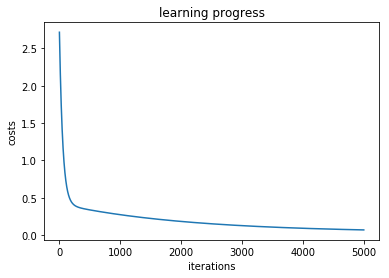

In [18]:
cost_y, theta_0, theta_1 = train_univariate_linear_regression(x=x, y=y,
                                                              start_theta_0=0.5,
                                                              start_theta_1=1.5,
                                                              learning_rate=0.001,
                                                              iterations=5000)
cost_x = np.arange(0, len(cost_y))

plt.title("learning progress")
plt.xlabel("iterations")
plt.ylabel("costs")
plt.plot(cost_x, cost_y)
plt.show()


# 6. Modell (Fit-Gerade) + Daten

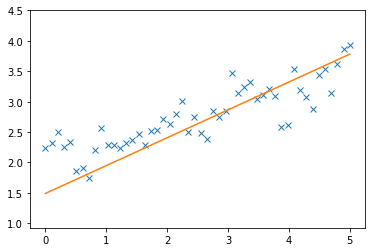

In [19]:
fit_line_x = x
fit_line_y = []
hypothesis = linear_hypothesis(theta_0, theta_1)
for x_with_another_name_because_jupyter_notebook_is_shit in fit_line_x:
    fit_line_y.append(hypothesis(x_with_another_name_because_jupyter_notebook_is_shit))
    
plt.plot(x, y, "x")
plt.plot(fit_line_x, fit_line_y)
plt.axis("equal")
plt.show()


# 7. Training mit verschiedenen $\alpha$'s

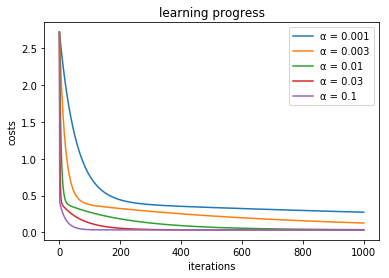

In [23]:
learning_rates = [0.001, 0.003, 0.01, 0.03, 0.1]

for learning_rate in learning_rates:
    cost_y, theta_0, theta_1 = train_univariate_linear_regression(x=x, y=y,
                                                                  start_theta_0=0.5,
                                                                  start_theta_1=1.5,
                                                                  learning_rate=learning_rate,
                                                                  iterations=1000)
    cost_x = np.arange(0, len(cost_y))
    plt.plot(cost_x, cost_y, label="α = {}".format(learning_rate))

plt.title("learning progress")
plt.xlabel("iterations")
plt.ylabel("costs")
plt.legend()
plt.show()
